In [16]:
# Load the video data 
import numpy as np
import skvideo.io
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from tqdm import tqdm
import pickle
%matplotlib inline

In [17]:
filename = "sample.mp4" 
frames_to_load = 7273 # this is necessary because it seems to crash at the end of the video 

all_data = skvideo.io.vread(filename, num_frames=frames_to_load)
crop = 50
data = all_data[:, crop:-crop, crop:-crop, 0]
[N, X, Y] = data.shape

In [18]:
filtered = pickle.load(open("filtered.p", "rb"))
thresholded = pickle.load(open("thresholded.p", "rb"))
allparticles = pickle.load(open("allparticles.p", "rb"))

In [19]:

def com(xy, d):
    return np.average(xy, axis=1, weights=d[xy[1, :], xy[0, :]])


centers = []
for i in range(N):
    centers.append(np.transpose(np.asarray([com(p, filtered[i, :, :]) for p in allparticles[i]])))


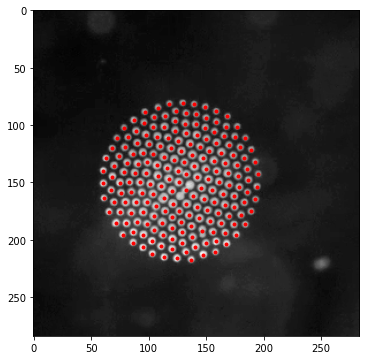

In [21]:
plt.figure(figsize=(6,6))
plt.imshow(data[0, :, :], "gray")
plt.plot(centers[0][0, :], centers[0][1, :], 'r.')
plt.show()

In [29]:
def dist(xy1, xy2):
    return (xy1[0] - xy2[0])**2 + (xy1[1] - xy2[1])**2
orderedcenters = [centers[0]]
for i in range(1, N):
    order = []
    for j in range(len(centers[i][0, :])):
        order.append(np.argmin(dist(centers[i], centers[i-1][:, j])))
    orderedcenters.append(centers[i][:, order])

orderedcenters[1]


IndexError: index 193 is out of bounds for axis 1 with size 193

/Users/henry/miniconda3/envs/chinlab/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: Input could not be cast to an at-least-1D NumPy array

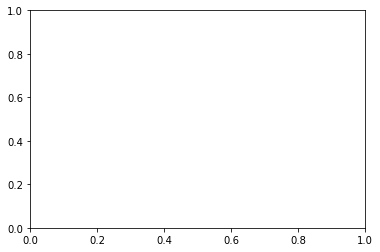

In [25]:
plt.figure()
plt.plot(orderedcenters)
plt.show()